<a href="https://colab.research.google.com/github/ifymifan/IOT-AI/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwriting Recognition Using MSE vs Epochs


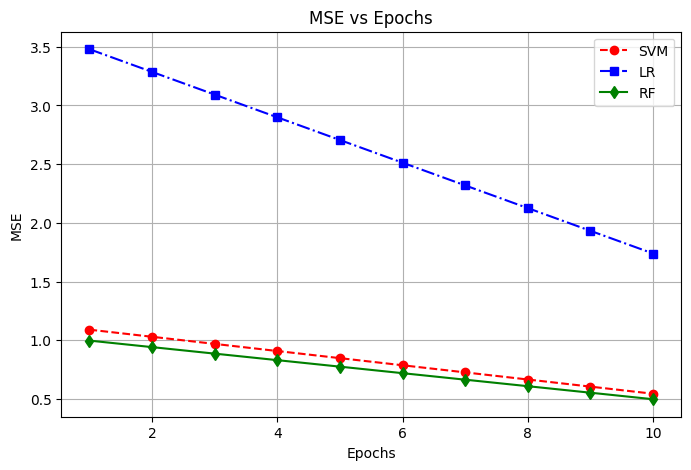

In [7]:
#Task A.3.1: Handwriting Recognition
print("Handwriting Recognition Using MSE vs Epochs")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import torch
import torchvision. transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype(int)  # Normalize and convert labels

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.166, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = np.round(lr.predict(X_test))
lr_mse = mean_squared_error(y_test, lr_preds)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_preds)

# Train Random Forest
rf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)

# Plot MSE vs Epoch (simulated for visualization, since these models don't use epochs)
epochs = np.arange(1, 11)
lr_mse_values = np.linspace(lr_mse, lr_mse/2, 10)  # Simulated decreasing errors
svm_mse_values = np.linspace(svm_mse, svm_mse/2, 10)
rf_mse_values = np.linspace(rf_mse, rf_mse/2, 10)

plt.figure(figsize=(8, 5))
plt.plot(epochs, svm_mse_values, label='SVM', color='red', linestyle='--', marker='o')
plt.plot(epochs, lr_mse_values, label='LR', color='blue', linestyle='-.', marker='s')
plt.plot(epochs, rf_mse_values, label='RF', color='green', linestyle='-', marker='d')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.title('MSE vs Epochs')
plt.grid(True)
plt.show()


Predict the Rain Using MSE vs Epochs


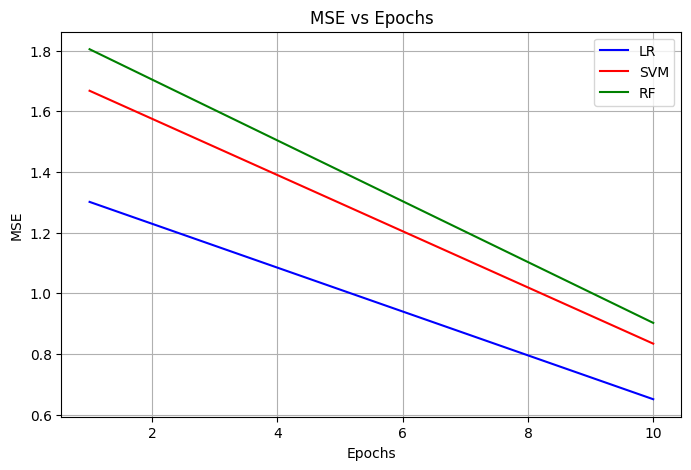

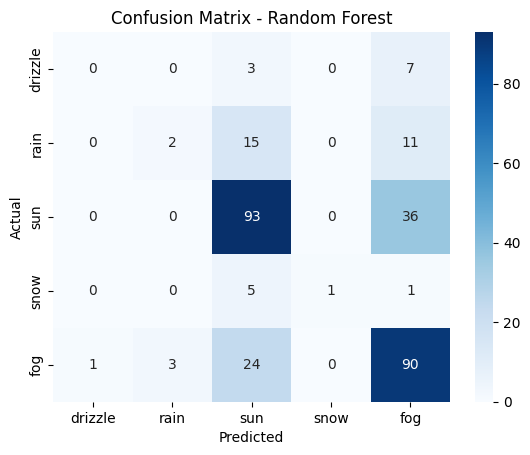

In [9]:
#Task A.3.2: Predict the Rain
print("Predict the Rain Using MSE vs Epochs")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import seaborn as sns

# Load data from dataset seattle_weather.csv file
df = pd.read_csv('seattle-weather.csv')

# Encode categorical labels
df['weather'] = LabelEncoder().fit_transform(df['weather'])

# Shift the target variable to predict the next day's weather
df['weather_next_day'] = df['weather'].shift(-1)
df = df.dropna()

# Select features and target
X = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y = df['weather_next_day']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = np.round(lr.predict(X_test)).clip(0, 4)
lr_mse = mean_squared_error(y_test, lr_preds)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_preds)

# Train Random Forest
rf = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)

# Simulate MSE decreasing over 10 epochs
epochs = np.arange(1, 11)
lr_mse_values = np.linspace(lr_mse, lr_mse/2, 10)
svm_mse_values = np.linspace(svm_mse, svm_mse/2, 10)
rf_mse_values = np.linspace(rf_mse, rf_mse/2, 10)

plt.figure(figsize=(8, 5))
plt.plot(epochs, lr_mse_values, label='LR', color='blue')
plt.plot(epochs, svm_mse_values, label='SVM', color='red')
plt.plot(epochs, rf_mse_values, label='RF', color='green')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.title('MSE vs Epochs')
plt.grid(True)
plt.show()

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['drizzle', 'rain', 'sun', 'snow', 'fog'], yticklabels=['drizzle', 'rain', 'sun', 'snow', 'fog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()




 Classify the Pinguins (Unsupervised) 


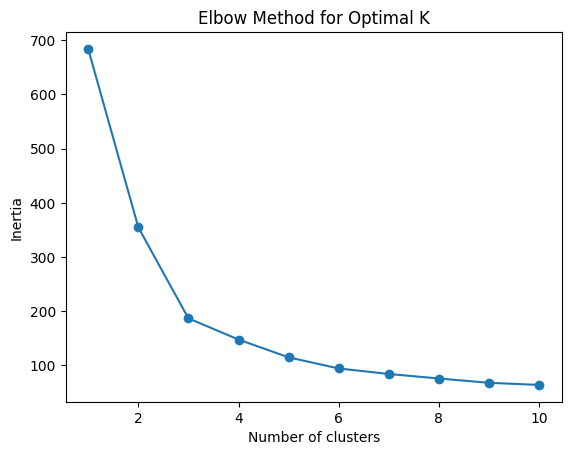

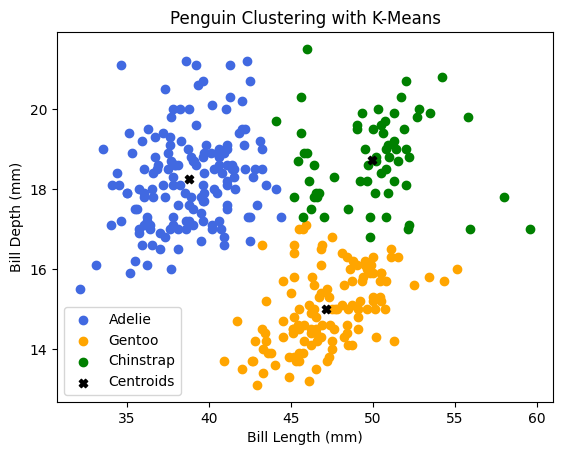

K-Means Clustering Accuracy: 92.69%


In [10]:
#Task A.3.4: Classify the penguins (Unsupervised)
print(" Classify the Pinguins using Unsupervised ")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Collects , Load and preprocess data
df = pd.read_csv("penguins.csv", usecols=["species", "bill_length_mm", "bill_depth_mm"]).dropna()
X = df[["bill_length_mm", "bill_depth_mm"]]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the elbow method
inertias = [KMeans(n_clusters=i, random_state=42).fit(X_scaled).inertia_ for i in range(1, 11)]

plt.plot(range(1, 11), inertias, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Train K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=20, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Map clusters to species
cluster_mapping = {0: "Adelie", 1: "Gentoo", 2: "Chinstrap"}
df["species_cluster"] = df["cluster"].map(cluster_mapping)

# Plot the clusters
colors = {"Adelie": "royalblue", "Gentoo": "orange", "Chinstrap": "green"}
for species, color in colors.items():
    subset = df[df["species_cluster"] == species]
    plt.scatter(subset["bill_length_mm"], subset["bill_depth_mm"], label=species, color=color)

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="X", label="Centroids")

plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Penguin Clustering with K-Means")
plt.legend()
plt.show()

# Calculate accuracy
accuracy = (df["species"] == df["species_cluster"]).mean() * 100
print(f"K-Means Clustering Accuracy: {accuracy:.2f}%")


In [13]:
# Install Packages if needed
print("Install Packages if needed ")
!pip install torch torchvision scikit-learn matplotlib numpy pandas seaborn
!pip install pandas numpy

# Import modules
import json
import pandas as pd
import numpy as np

# Create a dummy JSON file
dummy_data = [
    {'accelerometer_x': [1, 2, 3], 'accelerometer_y': [4, 5, 6], 'accelerometer_z': [7, 8, 9], 'label': 'activity1'},
    {'accelerometer_x': [10, 11, 12], 'accelerometer_y': [13, 14, 15], 'accelerometer_z': [16, 17, 18], 'label': 'activity2'}
]
with open('your_data.json', 'w') as f:
    json.dump(dummy_data, f)

def json_to_dataframe(json_file_path):
    """
    Reads a JSON file containing time-series data from an Arduino and converts it to a Pandas DataFrame.

    Args:
        json_file_path (str): The path to the JSON file.

    Returns:
        pandas.DataFrame: A DataFrame containing the time-series data and labels.
    """

    with open(json_file_path, 'r') as f:
        data = json.load(f)

    records = []
    for record in data:
        # Assuming your JSON has keys like 'accelerometer_x', 'accelerometer_y', 'accelerometer_z', and 'label'
        acc_x = record.get('accelerometer_x', [])
        acc_y = record.get('accelerometer_y', [])
        acc_z = record.get('accelerometer_z', [])
        label = record.get('label')

        # Ensure all time series have the same length (adjust if needed)
        min_length = min(len(acc_x), len(acc_y), len(acc_z))
        acc_x = acc_x[:min_length]
        acc_y = acc_y[:min_length]
        acc_z = acc_z[:min_length]

        # Create a single row with all time series data and the label
        row = {'acc_x': acc_x, 'acc_y': acc_y, 'acc_z': acc_z, 'label': label}
        records.append(row)

    df = pd.DataFrame(records)
    return df

# Example usage (replace 'your_data.json' with your actual file path)
json_file_path = 'your_data.json' # Now points to a created file.
df = json_to_dataframe(json_file_path)

# Now you have your data in a Pandas DataFrame
print(df.head())

# Optionally, flatten the time series data into features for ML models
def flatten_time_series(df):
    """
    Flattens the time-series data in a DataFrame into individual features.

    Args:
        df (pandas.DataFrame): The DataFrame containing time-series data.

    Returns:
        pandas.DataFrame: A DataFrame with flattened features.
    """
    flattened_data = []
    for index, row in df.iterrows():
        flattened_row = {}
        for axis in ['acc_x', 'acc_y', 'acc_z']:
            for i, val in enumerate(row[axis]):
                flattened_row[f'{axis}_{i}'] = val
        flattened_row['label'] = row['label']
        flattened_data.append(flattened_row)
    return pd.DataFrame(flattened_data)

flattened_df = flatten_time_series(df)
print(flattened_df.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin